<a href="https://colab.research.google.com/github/black26666/Landing-page/blob/main/M3ExploratoryDataAnalysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [16]:
!pip install seaborn
!pip install seaborn matplotlib pandas


In [18]:
import pandas as pd
import seaborn as Sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [19]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-21-3214ce587501>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde=True)


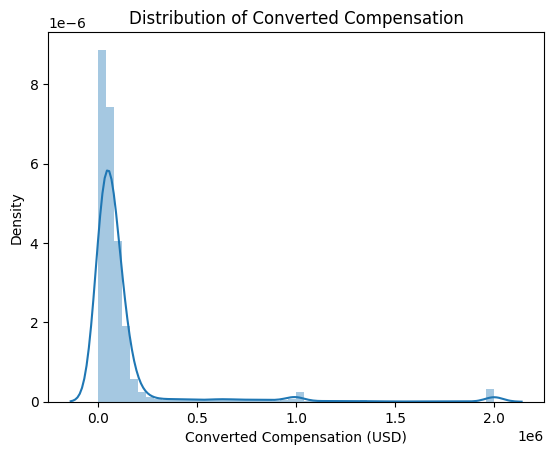

In [21]:
# Plot the distribution of ConvertedComp
sns.distplot(df['ConvertedComp'], kde=True)
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


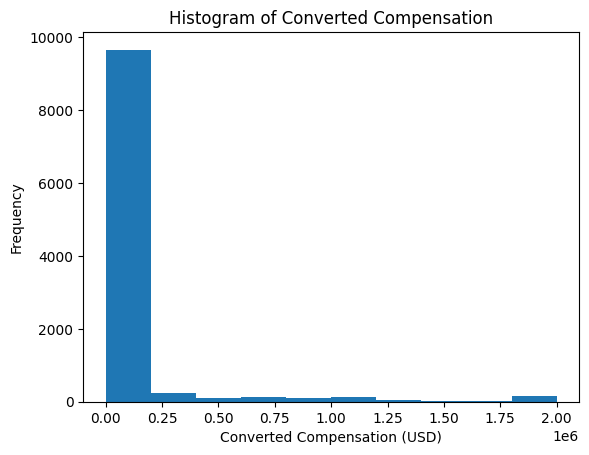

In [22]:
# your code goes here
plt.hist(df['ConvertedComp'])
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()


What is the median of the column `ConvertedComp`?


In [23]:
# your code goes here
median_convertedcomp = df['ConvertedComp'].median()
print(median_convertedcomp)


57745.0


How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here
num_men = df[df['Gender'] == 'Man'].shape[0]
print(num_men)


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
# your code goes here
median_convertedcomp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(median_convertedcomp_women)


57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
age_summary = df['Age'].describe()
print(age_summary)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


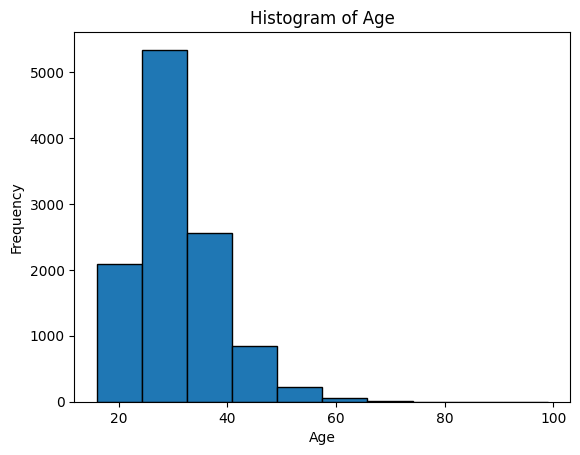

In [27]:
# your code goes here
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


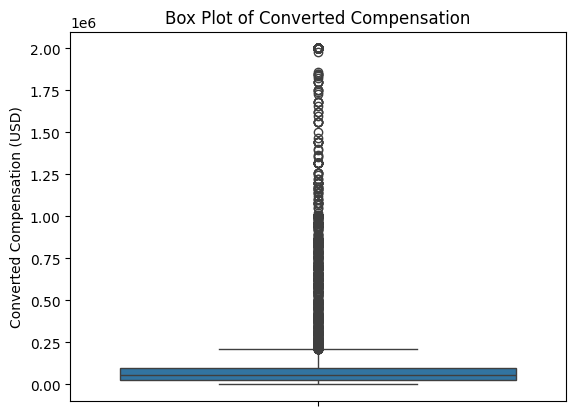

In [28]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['ConvertedComp'])
plt.ylabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [33]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR): {IQR}")


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [34]:
# your code goes here
# Assuming you have already calculated Q1, Q3, and IQR as in the previous response
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
# Assuming you have already calculated upper_bound and lower_bound
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")


Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
# your code goes here
# Assuming you have already calculated upper_bound and lower_bound
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# To verify the shape of the new DataFrame:
print(f"Shape of original DataFrame: {df.shape}")
print(f"Shape of DataFrame without outliers: {df_no_outliers.shape}")


Shape of original DataFrame: (11398, 85)
Shape of DataFrame without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
# your code goes here
numerical_cols = df.select_dtypes(include=['number'])
correlation_with_age = numerical_cols.corr()['Age']

print(correlation_with_age)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
